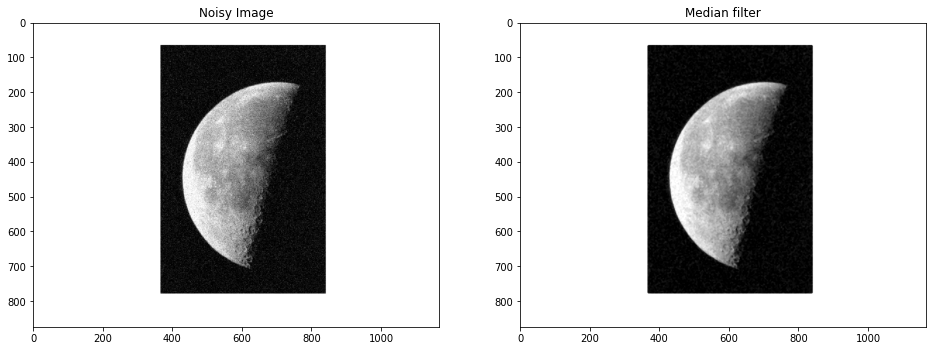

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = plt.imread('Fig3noisymoon.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
median = cv2.medianBlur(img,5)
plt.figure(figsize=(16, 16))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Noisy Image')
plt.subplot(122),
plt.imshow(median,cmap = 'gray')
plt.title('Median filter')
plt.show()

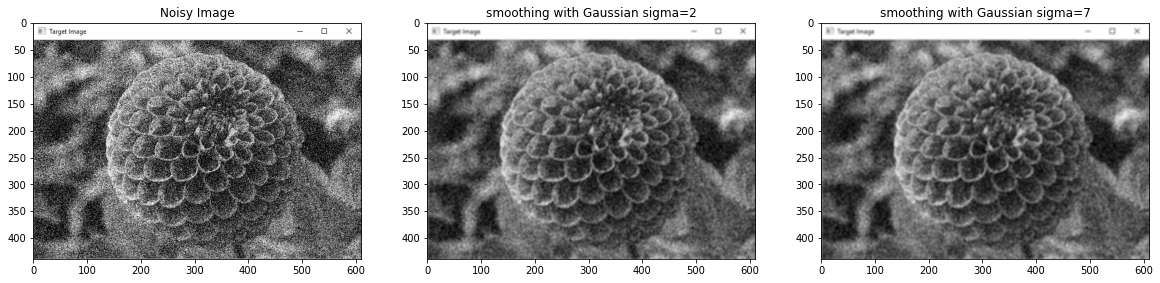

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img2 = plt.imread('noisy-grayscale.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kernel1 = np.ones((5,5),np.float32)/25
kernel2 = np.ones((11,11),np.float32)/121

I_avg_smooth1 = cv2.filter2D(img2,-1,kernel1)
I_avg_smooth2 = cv2.filter2D(img2,-1,kernel2)

I_gaussian_blur1 = cv2.GaussianBlur(img2,(5,5),2,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img2,(5,5),7,cv2.BORDER_DEFAULT)

plt.figure(figsize=(20, 20))
plt.subplot(1,3,1),plt.imshow(img2,cmap = 'gray')
plt.title('Noisy Image')

plt.subplot(1,3,2),
plt.imshow(I_gaussian_blur1,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=2')

plt.subplot(1,3,3),
plt.imshow(I_gaussian_blur2,cmap = 'gray')
plt.title('smoothing with Gaussian sigma=7')

plt.show()


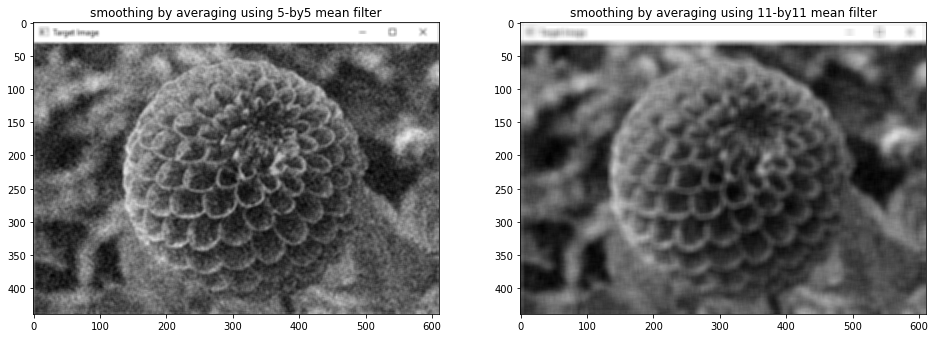

In [ ]:

plt.figure(figsize=(16, 16))

plt.subplot(1,2,1),
plt.imshow(I_avg_smooth1,cmap = 'gray')
plt.title('smoothing by averaging using 5-by5 mean filter')

plt.subplot(1,2,2),
plt.imshow(I_avg_smooth2,cmap = 'gray')
plt.title('smoothing by averaging using 11-by11 mean filter')
plt.show()


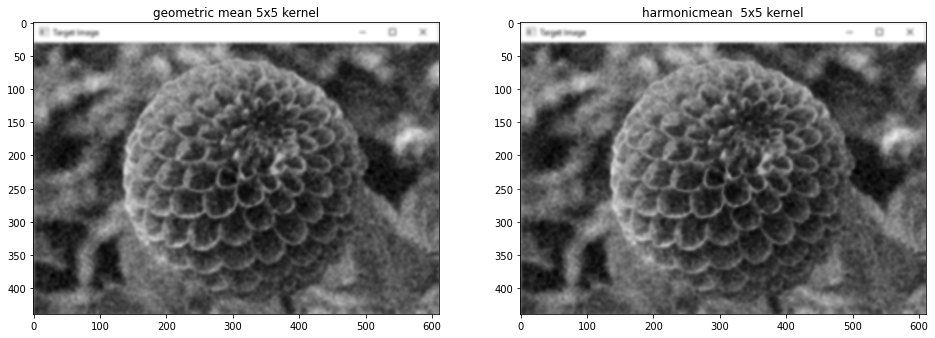

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img3=I_avg_smooth1;
rows, cols = img3.shape[:2]
ksize = 5

padsize = int((ksize-1)/2)
pad_img = cv2.copyMakeBorder(img3, *[padsize]*4, cv2.BORDER_DEFAULT)
geomean1 = np.zeros_like(img3)
for r in range(rows):
    for c in range(cols):
        geomean1[r, c] = np.prod(pad_img[r:r+ksize, c:c+ksize])**(1/(ksize**2))



harmonicmean = np.zeros_like(img3)
for r in range(rows):
    for c in range(cols):
        harmonicmean[r, c] = 1/np.sum(1/pad_img[r:r+ksize, c:c+ksize])
harmonicmean = harmonicmean*ksize**2

plt.figure(figsize=(16, 16))

plt.subplot(1,2,1),

plt.imshow(geomean1)
plt.title('geometric mean 5x5 kernel')

plt.subplot(1,2,2),

plt.imshow(harmonicmean)
plt.title('harmonicmean  5x5 kernel')
plt.show()


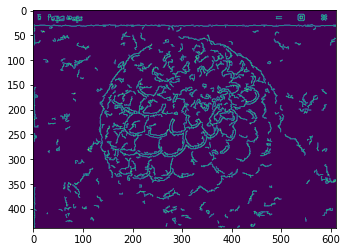

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
imgl = plt.imread('noisy-grayscale.png')
imgl = cv2.cvtColor(imgl, cv2.COLOR_BGR2GRAY)

imgl=(imgl*255).astype(np.uint8)

I_gaussian_blur1 = cv2.GaussianBlur(imgl,(5,5),3,cv2.BORDER_DEFAULT)
Gb1 = np.uint8(I_gaussian_blur1)
cannyedges = cv2.Canny(Gb1,100,200)
plt.imshow(cannyedges)


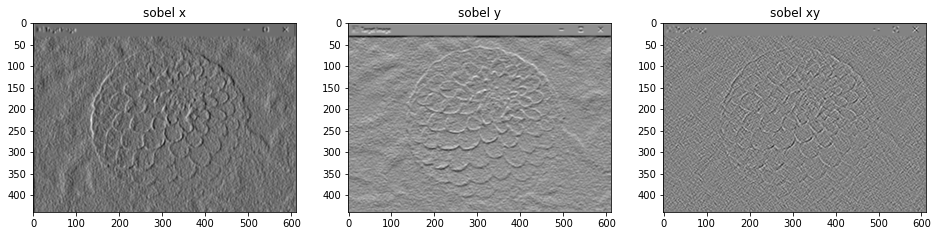

In [ ]:
# Sobel Edge Detection

sobelx = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combined X and Y Sobel Edge Detection

plt.figure(figsize=(16, 16))

plt.subplot(1,3,1),
plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x')

plt.subplot(1,3,2),
plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y')


plt.subplot(1,3,3),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')
plt.show()

# Use the x & direction to compute the image orientation


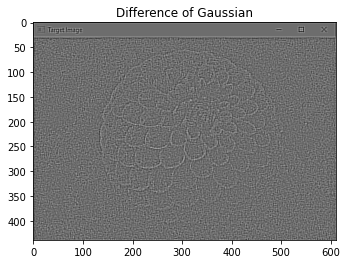

In [ ]:
I_gaussian_blur1 = cv2.GaussianBlur(img2,(5,5),3,cv2.BORDER_DEFAULT)
I_gaussian_blur2 = cv2.GaussianBlur(img2,(5,5),7,cv2.BORDER_DEFAULT)

DOG=I_gaussian_blur1-I_gaussian_blur2
plt.imshow(DOG)
plt.title('Difference of Gaussian')
plt.show()

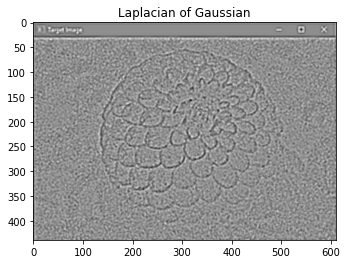

In [ ]:
ksize=7
lapedges = cv2.Laplacian(I_gaussian_blur1, cv2.CV_64F, ksize=ksize) 

plt.imshow(lapedges)
plt.title('Laplacian of Gaussian')
plt.show()